# 다중 클래스 분류를 위한 강인한 SVM 설계 방법 (2005)
( Robust SVM Design for Multi-Class Classification )

조민국, 박혜영 (경북대학교 컴퓨터과학과)


## 요약 
- SVM(Support Vector Machine)은 좋은 일반화 능력을 가진 학습시스템으로, 다양한 패턴 인식 분야에서 적용되고 있다.
- 기본적으로는 이진 분류기로 두 개 이상의 클래스를 분류하기 위해서는 다중 클래스 분류가 가능한 형태로의 설계 방법이 필요하다.
- 이를 위해 각 클래스별로 독립적인 SVM들을 만들어 결과를 병합하는 방식이 주로 사용되어 왔다.
- 그러나 이러한 방법은 클래수의 수는 많고 한 클래스 내의 데이터의 수가 많지 않은 경우에는 SVM의 일반화 성능을 저하시키고 노이즈에 민감해지는 문제점을 가지고 있다.
- 이를 해결하기 위해 본 논문에서는 각 클래스내의 데이터간의 유사도 측정을 위한 통계적 정보를 안정적으로 추출하기 위해 두 데이터의 쌍을 입력으로 받는 새로운 SVM 설계 방법을 제시한다.
- 제안한 방법을 실제 생체인식 데이터에 적용한 실험에서 기존의 방법보다 우수한 분류 성능을 보임을 확인할 수 있었다.

## 논문 선택 이유
- 해당 논문을 리뷰하기 위해 선택한 이유는 현재 SVM을 이용한 아크 데이터의 이진분류, 다중분류를 하기 위한 모델을 설계하는 프로젝트를 진행 중에 있습니다.
- 아크 데이터의 Normal과 Arc를 분류하는 단순 이진 분류의 경우 안정적인 성능이 도출 하였지만 장소에 따른 10개의 클래스로 나뉘어진 Normal과 Arc를 분류하기 위해서 단순한 방법으로 SVM에 적용하였지만 요약에서 다룬 문제점과 같은 이유로 안정적이지 못한 성능을 도출 했습니다.
- 그리하여, 방법을 찾던 중 본 논문을 발견하게 되어 리뷰하게 되었습니다.

## SVM (Support Vector Machine) 이란?
- 분류 과제에 사용할 수 있는 강력한 머신러닝 지도학습 모델.
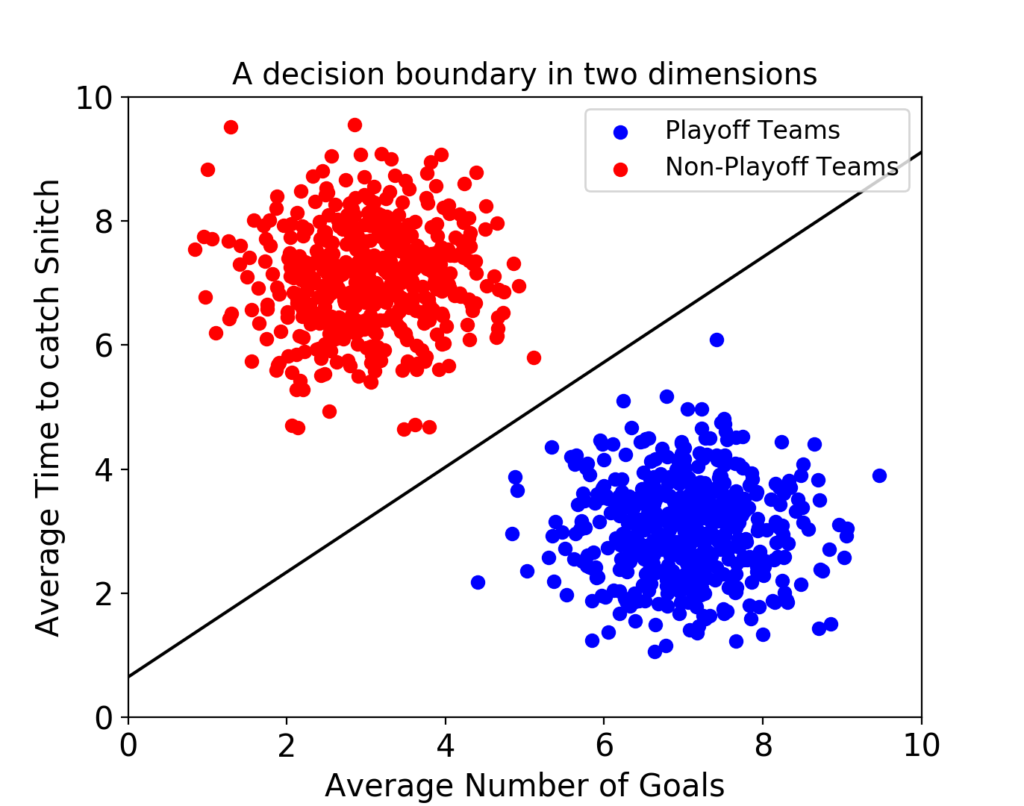

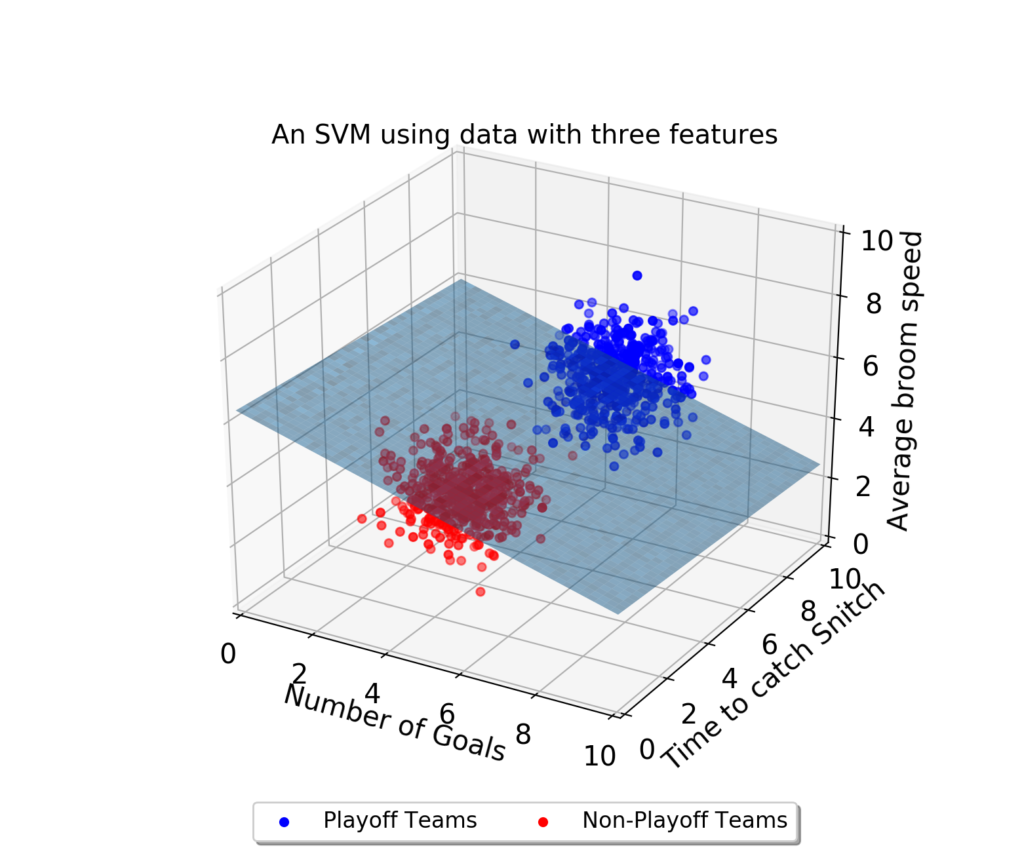

- 최적의 결정 경계를 찾아내 클래스를 분류하는 것.
- 보통 이진 분류를 위한 분류기로 사용되고 있고 다중 클래스 분류에서도 사용되기도 한다.
- 하지만, 다중 분류의 경우 위에서와 같은 문제점들이 빈번하게 발생하고 있다. 

## 서론 요약
- 다양한 패턴 인식 문제에서 SVM이 많이 적용되고 있다.
- SVM은 통계적으로 학습이론에 기반학여 결정 경계와 학습 샘플과의 거리를 최대화하도록 분류기를 학습함으로써 뛰어난 일반화 성능을 보여준다.
- 하지만 다른 학습 시스템과 같이 좋은 성능을 보이기 위해선 SVM을 학습시킬 충분히 많은 데이터가 필요하다.
- 도메인 성격상 데이터의 수가 상당히 제한적 일 때는 좋은 성능을 보장하기 어렵다.
- SVM은 기본적으로 이진 분류기이므로 다중 분류를 위해선 다중 클래스 분류기로 확장 되어야 하는데 여기엔 2가지 방법이 있다.

\----------------------------------------------------------------------------------------------------------------------------------------------------------------------------


1) 일대다 (OVA) 방법 : 각 클래스 별로 해당 클래스와 그 이외 나머지를 분류하는 방법 
 - 클래스의 수만큼의 분류기가 있어야 하므로 클래스의 수가 k개라면 k개의 분류기가 있어야 하며 데이터가 어떤 클래스인지 분류하기 위해선 k개의 분류기 중에서 출력 값이 가장 높은 SVM을 선택하는 방식으로 비교가 이루어진다.
- 문제점 : SVM을 학습시키기 위한 다른 클래스의 샘플을 정하는 것이 모호하다는 단점이 존재.


 2) 전부-쌍 (AP) 방법 : 각각의 클래스가 쌍을 이루어진 분류기를 만듬.
 - 클래스의 수가 k개이라면, 클래스의 조합만큼 k(k-1)/2개의 분류기가 있어야 한다.
 - 어떤 클래스인지 분류하기 위해서는 트리를 이용하여 k-1회의 토너먼트식 비교가 이루어진다.
- 문제점 : 학습해야할 SVM의 복잡하다는 단점이 존재.

**두 방법 모두 한 클래스에 속하는 데이터의 수가 적을 때는 노이즈에 강인한 결과를 얻기 힘들다**

\-----------------------------------------------------------------------------------------------------------------------------------------------------------------


결론)
- 이러한 문제점을 해결하기 위해 두 데이터 쌍 간의 유사도를 결정하는 함수를 SVM으로 학습시켜 다중 클래스의 분류에 이용하는 방법을 제안.
- 1개의 SVM으로 모든 클래스를 분류할 수 있으며, SVM을 학습할 때 사용하는 데이터의 수가 늘어나므로 학습 셋으로부터 분류 시 필요한 통계적 정보를 최대한 활용하는 시스템을 만들 수 있다. 

## 본론 요약
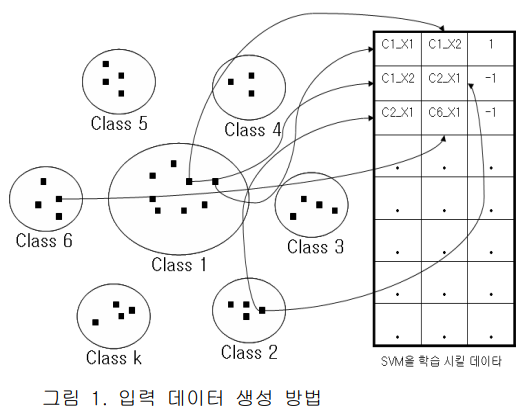
- 본 논문에서 제안하는 방법은 먼저 그림 1에서와 같이 SVM에 주어질 새로운 입력 데이터를 만든다.
- 학습 집합 내의 모든 데이터는 자신의 클래스를 포함한 모든 데이터와 쌍을 이루어 두 데이터의 순서쌍 형태로 하나의 새로운 데이터를 만든다. 
- 즉, 새로운 입력 데이터는 z_ij = (x_i, x_j) 와 같은 수식을 따른다.


- 만약 학습 셋에 k개의 클래스가 존재하고 한 클래스 당 n개의 데이터가 존재한다면 제안하는 방법에서 새롭게 생성된 데이터 셋의 원소의 수는 kn(kn - 1)개 이다.
- 이는 기존의 OVA 방법을 쓰는 경우 하나의 SVM에 주어지는 학습 데이터의 수가 kn개인 것을 고려할 때 월등히 많은 수임을 알 수 있다.
- 따라서 보다 통게적으로 안정적인 학습이 가능해지고, 노이즈에 강인한 분류기를 만들 수 있으리라 기대된다.
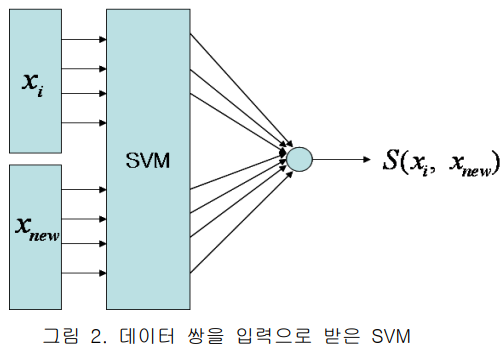

## 실험
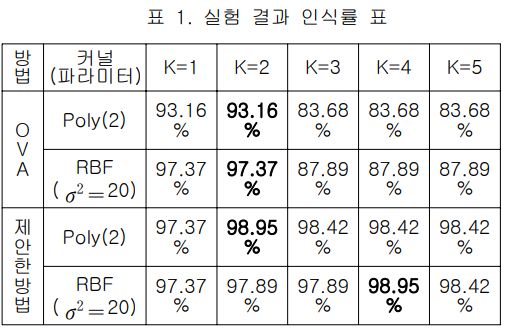

- 제안된 방법을 적용하여 생체 인식 데이터로 실험을 해본 결과는 다음과 같다.
## 결론
- 본 논문에서는 분류 대상 클래스의 수가 많고 클래스 내의 데이터 수가 적은 경우에도 노이즈에 강인한 일반화 능력을 보이는 SVM 다중 클래스 분류기의 설계 방법을 제안.


## 소감 
- SVM을 통한 다중 분류를 위해서 다양한 방법들을 찾아보았었다. 
- 논문에서 소개한 OVA나 AP와 같은 잘 알려진 다중 분류 방법들 또한 찾아보았고 적용해보았지만 논문에서 소개한 문제점들이 발생하였다.
- 방법을 찾아보던 중 해당 논문에서 소개한 방식이 현재 진행하는 프로젝트에 좋은 영향을 끼칠 수도 있을 것이라는 생각을 하게 되었고 데이터 수의 부족과 많은 클래스의 생성의 문제를 해결하여 좋은 성능을 도출해낼 새로운 방법이라고 생각했고 현재 상황과 아주 잘 드러맞는 내용이라 생각이 들었다.
- 제안된 방법을 활용하여 설계까지 이루어진다면 분명 좋은 결과를 이끌어 낼 거라 생각한다. 